# Esempi di approssimazioni con le B-Spline Gerarchiche

In [1]:
from Curve_Fitting import Model
from HB_Spline import HB_Spline
from B_Spline import B_Spline
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

np.random.seed(1304)

Per la creazione delle B-spline gerarchiche abbiamo bisogno di una B-spline madre.

In [2]:
base  = B_Spline(
        knots=np.linspace(0,10,5+1),
        order=3
    )

hb = HB_Spline(base)

Per i vari esempi useremo sempre lo stesso ordine della base, ma eventualmente cambieremo il vettore esteso dei nodi. 
> Le basi possono essere definite in un intervallo arbitrario e non è necessario che coincidano con il dominio della funzione da approssimare. Tuttavia è più comodo durante la fase di rifinitura che i domini coincidano.

Per approssimare le varie funzioni dobbiamo risolvere il problema dei minimi quadrati, più precisamente dobbiamo risolvere il sistema sovradeterminato $$A\underline{x} = \underline{d}$$ che non ha soluzione in senso classico.

La matrice $A$ è detta matrice di collocamento, ovvero la matrice composta dalle basi valutate nelle ascisse di valutazione ad esclusione di quelle valutate nei nodi ausiliari. In altri contesti viene chiamata anche matrice di costruzione o di design. Nel nostro caso usiamo la base delle HB-sline e B-spline, ma si può usare una qualsiasi base, come quella delle potenze. Naturalmente le prestazioni e accuratezza variano in base al contesto.

Il vettore $\underline{d}$ sono i dati e il vettore incognito $\underline{x}$ sono i punti di controllo che ci permettono di approssimare i dati.

Il sistema viene risolto utilizzando la fattorizzazione QR.
Tale risoluzione è implementato nella classe ```Model``` nel modulo [Curve_Fitting.py](/Curve_Fitting.py)

## Approssimazione di una retta

Iniziamo da un esempio molto semplince e proviamo ad approssimare la funzione $y = x$

Generiamo i dati aggiungendo un errore casuale

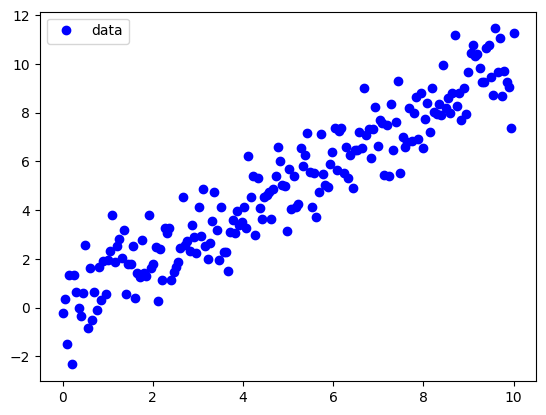

In [3]:
samples = np.shape(
    base.compute_base().get_collocation_matrix()
)[1]

x = np.linspace(0, 10, samples)
y= x + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T

plt.plot(x, y, "bo", label="data")
plt.legend(loc="best")

Adesso calcoliamo un'approssimazione della funzione generatrice e per farlo utilizziamo la classe ```Model```. Il costruttore necessita di un oggetto HB-spline e una matrice dei dati, che nel nostro caso, utilizzando la nomenclatura di numpy, sono un ```ndarray```, con $n = 2$. 

MSE:1.042027e+00


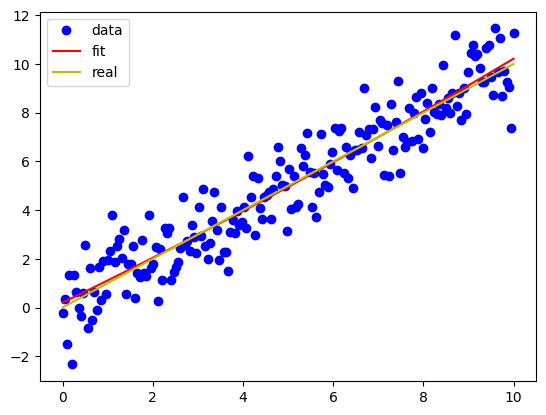

In [4]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, x, "y-", label="real")
plt.legend(loc="best")

In questo caso si nota un'approssimazione soddisfacente che non necessita di raffinamento.

Giocanto con il vettore esteso dei nodi e l'ordine della base, si possono avere fit migliori o peggiori.

Ad esempio se siamo troppo generosi con la scelta dell'*ordine* e degli *intervalli* inizieremo a modellare il rumore al posto della funzione generatrice.

Ci possiamo accorgere "ad occhio" che siamo in **overfitting** se la curva presenta varie ondulature, come si può vedere nell'esempio seguente.

MSE:9.315689e-01


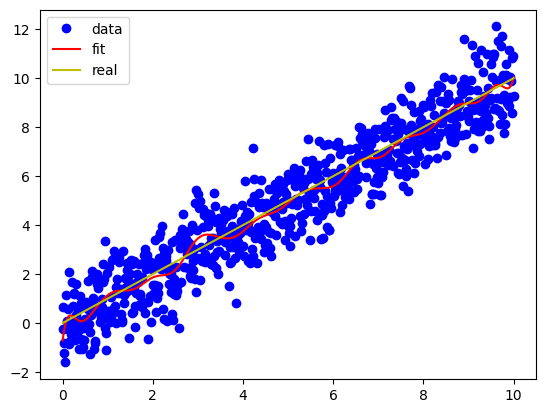

In [5]:
base  = B_Spline(
        knots=np.linspace(0,10,30+1),
        order=5
    )

hb = HB_Spline(base)

samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y= x + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T

model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, x, "y-", label="real")
plt.legend(loc="best")


## Approssimazione di una parabola

Vediamo ora un esempio un po' piú complesso.
Supponiamo di voler approssimare i seguenti dati

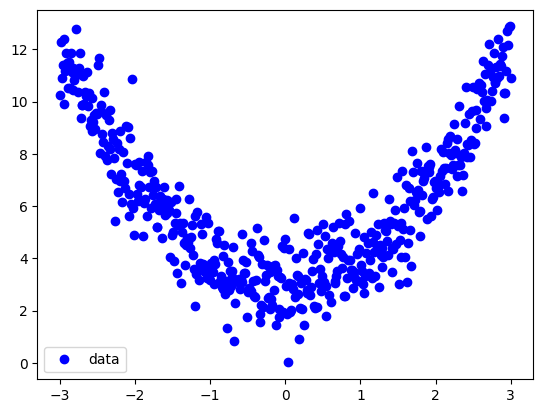

In [6]:
base  = B_Spline(
    knots=np.linspace(-3,3,8+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(-3, 3, samples)
y_real = 3 + np.power(x,2)
y = np.random.normal(3 + np.power(x,2), 1, samples)

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

Vediamo come l'algoritmo approssima questa funzione.

MSE:9.230662e-01


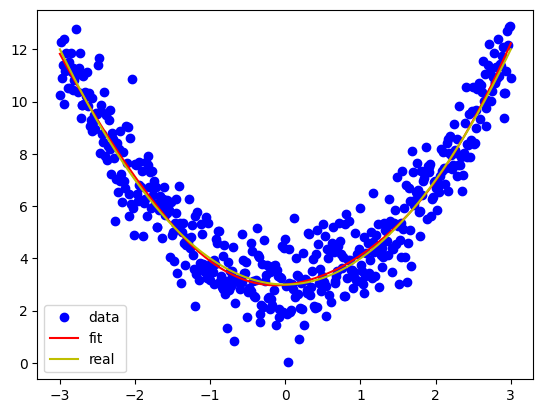

In [7]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

Come possiamo vedere, con un ordine basso e con pochi nodi siamo riusciti ad avere un'approssimazione quasi perfetta della funzione generatrice.

Tuttavia è una funzione molto semplice, quindi adesso ne vedremo di più complesse.

## Approssimazione del seno
Vediamo ora come se la cava l'algoritmo nell'approssimazione di una funzione trigonometrica.

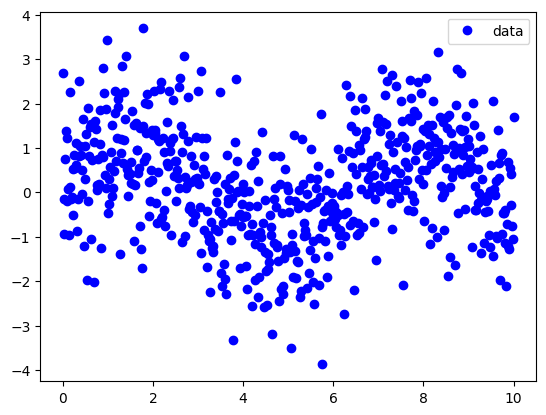

In [8]:
base  = B_Spline(
    knots=np.linspace(0,10,10+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y_real = np.sin(x)
y= np.random.normal(np.sin(x),1,samples)

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

## 

MSE:1.092578e+00
MSE:1.085962e+00
MSE:9.515441e-01


Text(0.5, 1.0, 'Raffinatura automatica MSE:9.515441e-01')

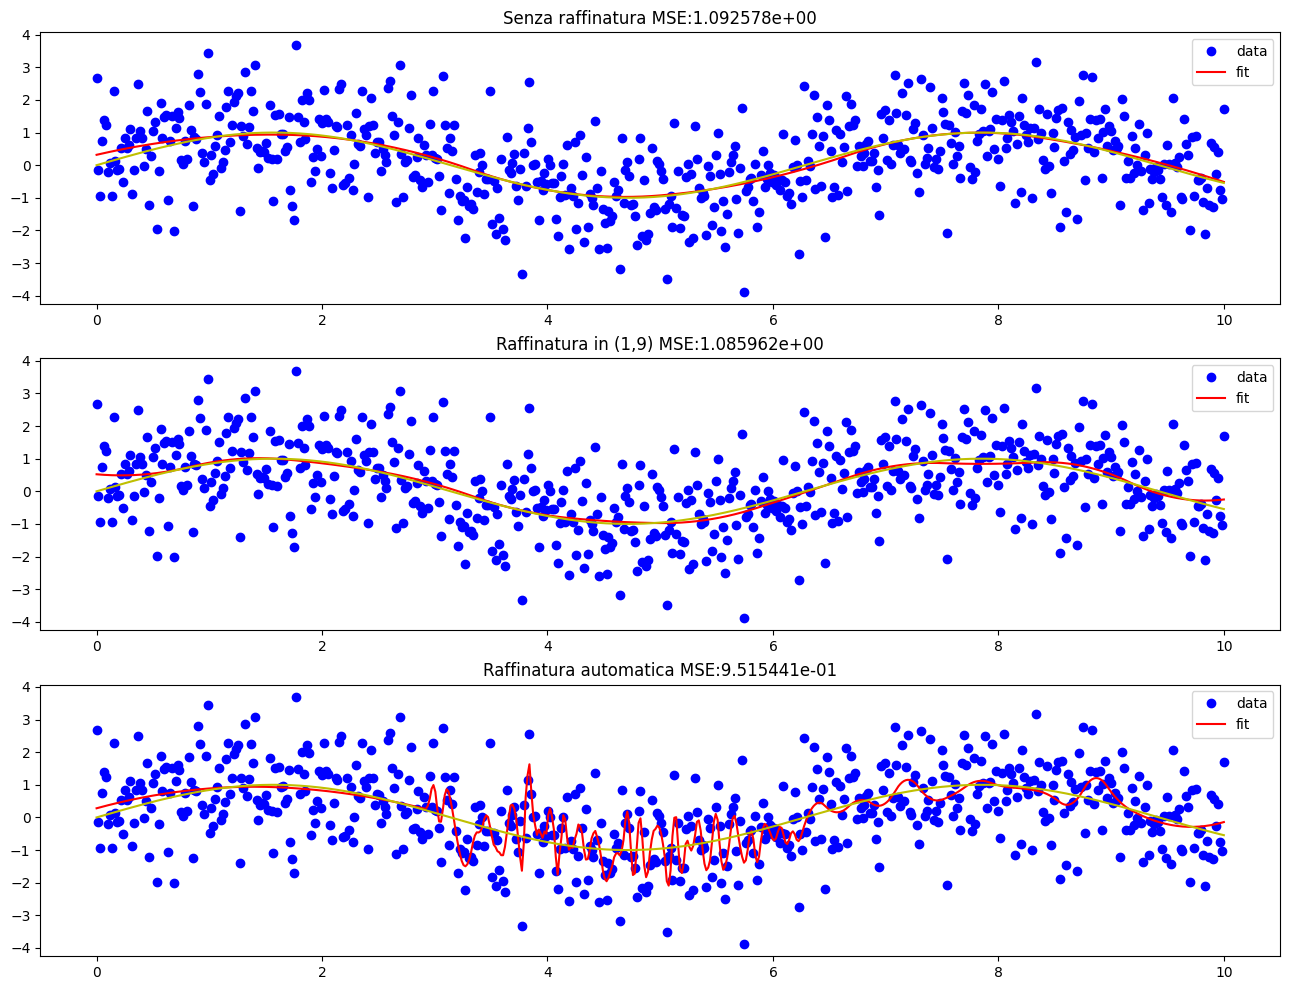

In [9]:
model = Model(
    base=hb,
    data=data
).fit()

model_auto = deepcopy(model)

fig, ax = plt.subplots(3, 1, figsize=(16,12))
model.plot(ax[0])
ax[0].plot(x, y_real, "y-", label="real")
ax[0].set_title("Senza raffinatura"+" MSE:"+"{:e}".format(model.mse))

model.refine((2,8)).plot(ax[1])
ax[1].plot(x, y_real, "y-", label="real")
ax[1].set_title("Raffinatura in (1,9)"+" MSE:"+"{:e}".format(model.mse))

model_auto.iterative_refine().plot(ax[2])
ax[2].plot(x, y_real, "y-", label="real")
ax[2].set_title("Raffinatura automatica"+" MSE:"+"{:e}".format(model_auto.mse))

La raffinazione automatica, se pur portando ad un migliore adattamento dei dati, ha anche portato all' **overfitting**.

## Approssimazione della somma di seni
Proviamo adesso ad approssimara una funzione ancora più complessa ovvero $\sin(2x) + \sin(3x)$

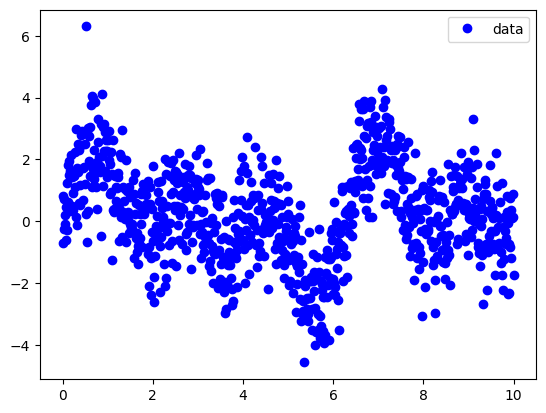

In [10]:
base  = B_Spline(
    knots=np.linspace(0,10,30+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y_real = np.sin(x) + np.sin(2 * x) + np.sin(3 * x)
y = y_real + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T
plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

MSE:1.027357e+00
MSE:1.029448e+00
MSE:1.037245e+00


Text(0.5, 1.0, 'Raffinatura Automatica B-Spline MSE:1.037245e+00')

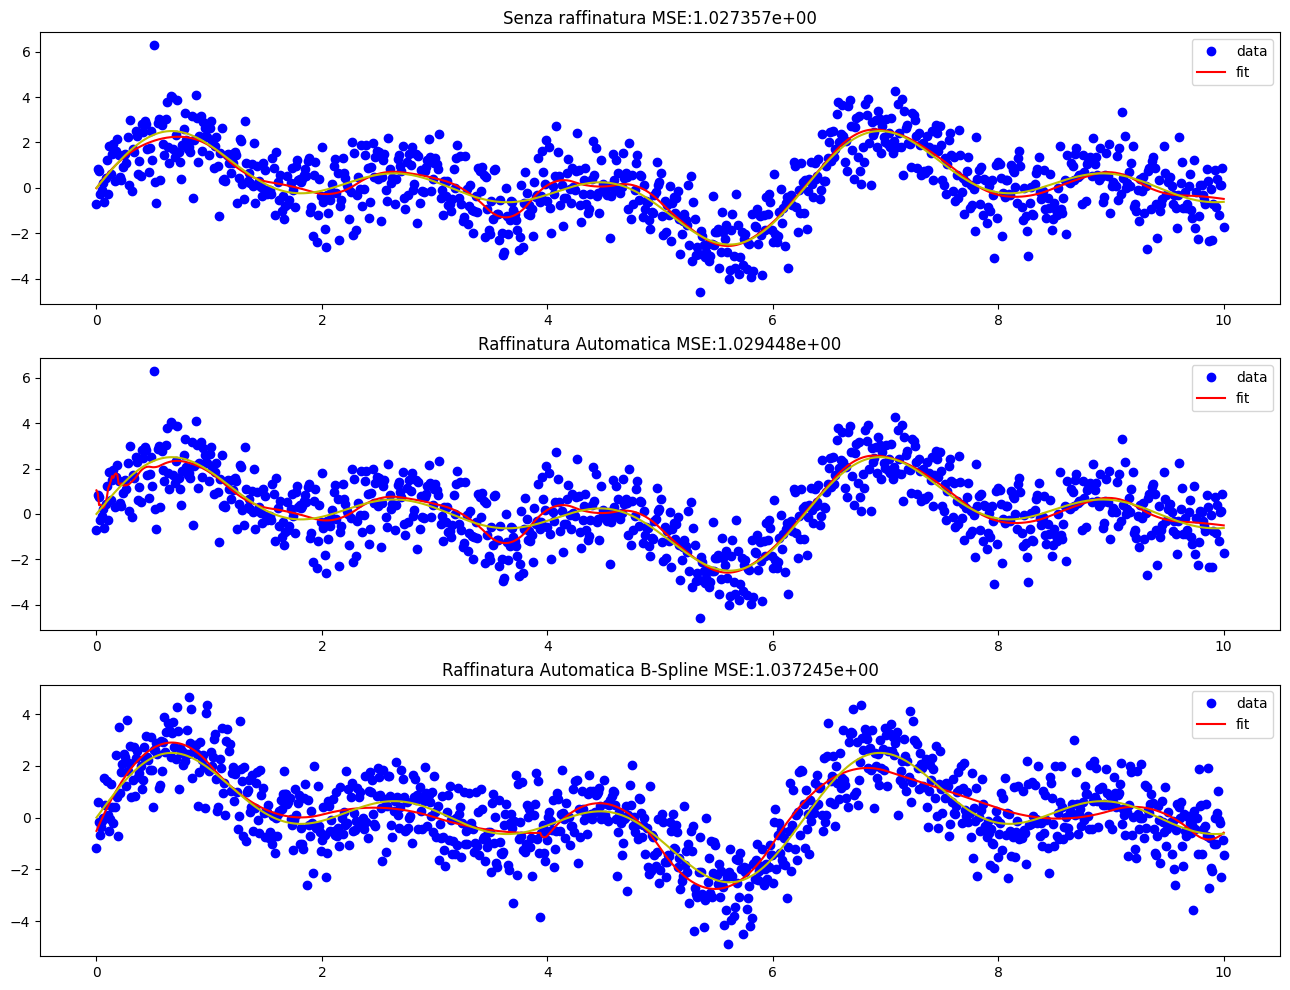

In [11]:
model_manual = Model(
    base=hb,
    data=data
)

model_auto = Model(
    base=hb,
    data=data
)

model_manual.fit()
model_auto.fit().iterative_refine()

fig, ax = plt.subplots(3, 1, figsize=(16,12))
model_manual.plot(ax[0])
ax[0].plot(x, y_real, "y-", label="real")
ax[0].set_title("Senza raffinatura"+" MSE:"+"{:e}".format(model_manual.mse))

model_auto.plot(ax[1])
ax[1].plot(x, y_real, "y-", label="real")
ax[1].set_title("Raffinatura Automatica"+" MSE:"+"{:e}".format(model_auto.mse))

#Modello B-Spline
base_b  = B_Spline(
    knots=[0,0,0,1,2,3,4,5,6,7,8,9,10,10,10],
    order=3
) 
#Dobbiamo generare un po' di dati in più per far tornare le dimensioni durante l'inserimento dei nodi   
samples = np.shape(base_b.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y_real = np.sin(x) + np.sin(2 * x) + np.sin(3 * x)
y = y_real + np.random.normal(0, 1, samples)

data_b = np.matrix([x, y]).T
#Creiamo un modello con la base B-spline
auto_b = Model(
    base=base_b,
    data=data_b
).fit().iterative_refine()

auto_b.plot(ax[2])
ax[2].plot(x, y_real, "y-", label="real")
ax[2].set_title("Raffinatura Automatica B-Spline"+" MSE:"+"{:e}".format(auto_b.mse))




## Funzione di runge

La funzione di Runge è di particolare interesse durante l'approssimazione e interpolazione, presenta un aumento dell'errore in prossimità degli estremi se si aumenta il grado della base delle potenze. Questo fenomento si presenta con le ascisse di valutazione equidistanti come abbiamo noi. Vediamo come si comporta l'algoritmo. Il vantaggio di usare le base delle B-spline è che non dobbiamo aumentare il grado se vogliamo una maggiore accuratezza.

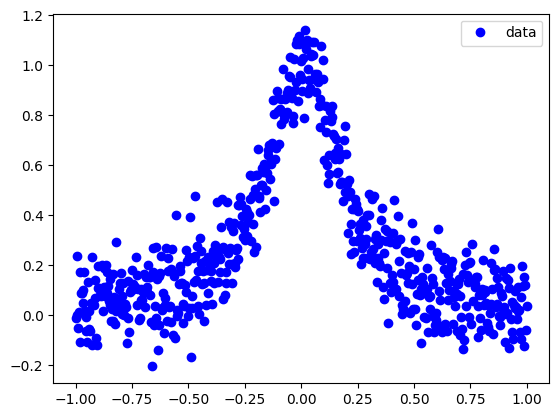

In [12]:
base  = B_Spline(
    knots=np.linspace(-1,1,10+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]


def runge_function(x):
    return 1 / (1 + 25 * x**2)

x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
y = y_real + np.random.normal(0, 0.1, len(x))

data = np.matrix([x, y]).T
plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

MSE:1.826487e-02
MSE:1.089727e-02
MSE:1.044166e-02


Text(0.5, 0.98, 'Raffinature successive HB-Spline')

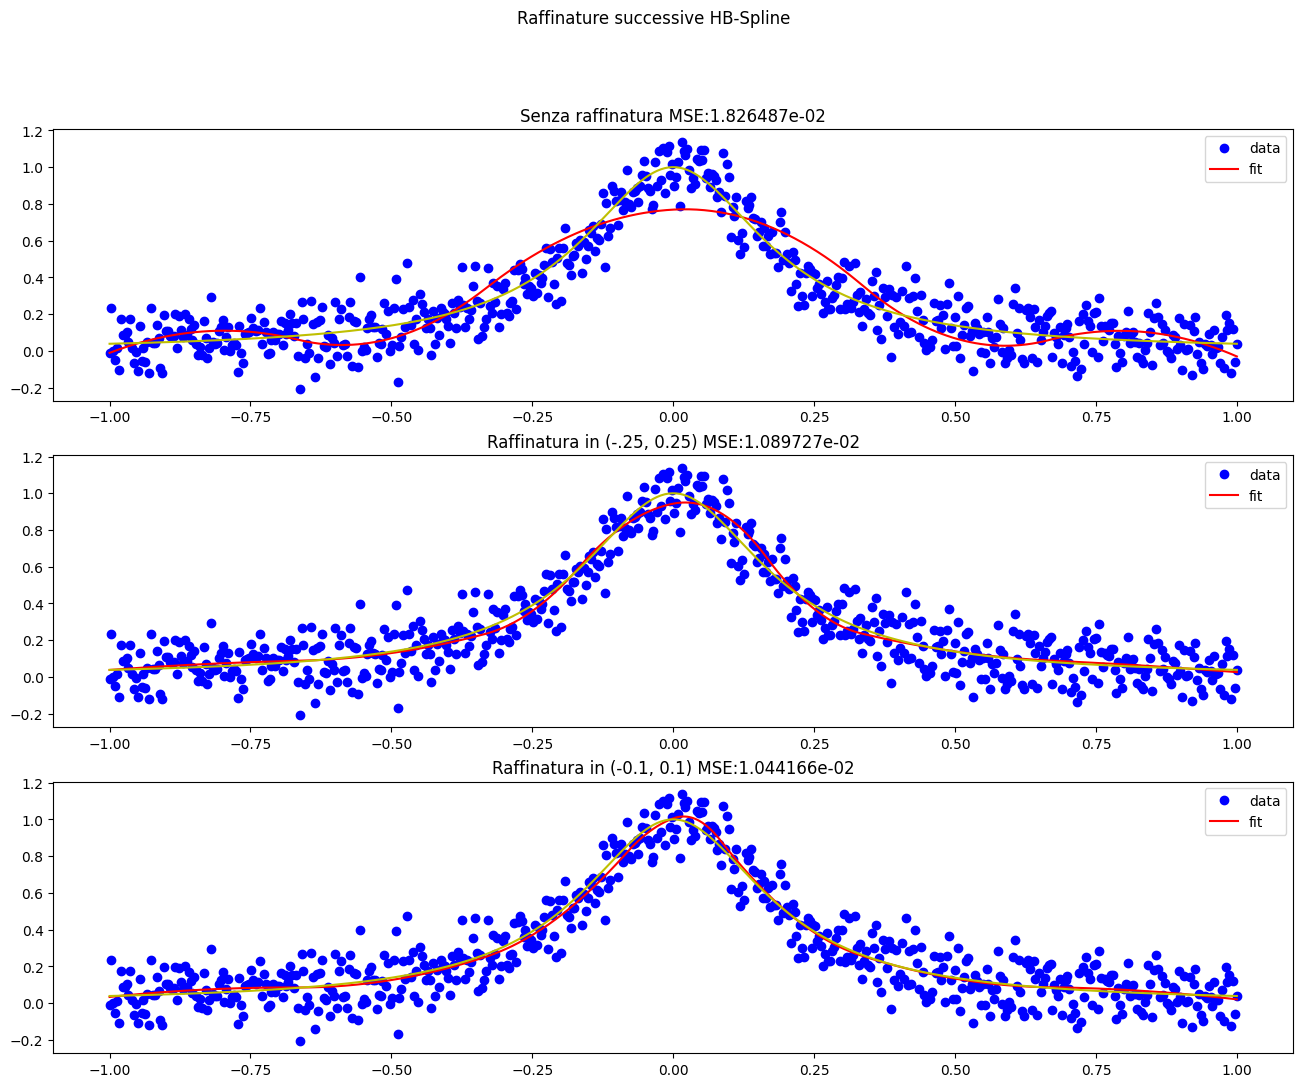

In [13]:
model = Model(
    base=hb,
    data=data
).fit()

fig, ax = plt.subplots(3, 1, figsize=(16,12))
model.plot(ax[0])
ax[0].plot(x, y_real, "y-", label="real")
ax[0].set_title("Senza raffinatura"+" MSE:"+"{:e}".format(model.mse))

model.refine((-.25,0.25)).plot(ax[1])
ax[1].plot(x, y_real, "y-", label="real")
ax[1].set_title("Raffinatura in (-.25, 0.25)"+" MSE:"+"{:e}".format(model.mse))

model.refine((-0.1,0.1)).plot(ax[2])
ax[2].plot(x, y_real, "y-", label="real")
ax[2].set_title("Raffinatura in (-0.1, 0.1)"+" MSE:"+"{:e}".format(model.mse))

plt.suptitle("Raffinature successive HB-Spline")

Confrontiamo adesso 3 metodi:
- Raffinazione manuale
- Raffinzaione automatica
- Raffinazione automatica tramite il knot_insertion (B-Spline)

MSE:9.819320e-03
MSE:1.064666e-02
MSE:9.547758e-03


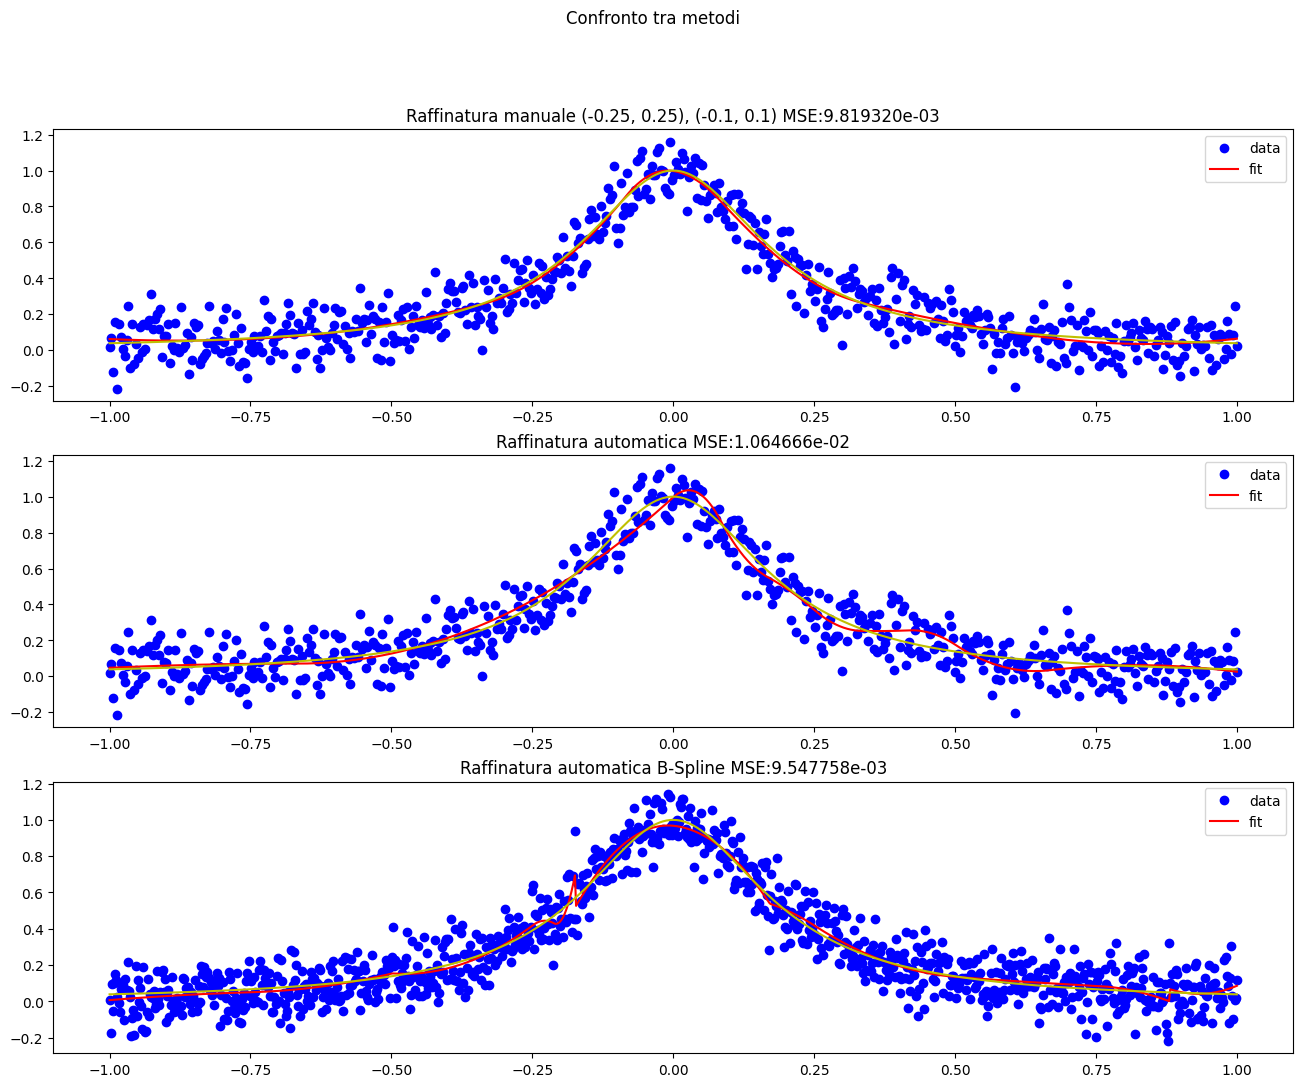

In [14]:
base_hb  = B_Spline(
    knots=np.linspace(-1,1,10+1),
    order=3
)

np.random.seed(1304)
samples = np.shape(base_hb.compute_base().get_collocation_matrix())[1]
#Addesso le B-Spline sono state calcolate e possiamo dichiarare le HB-Spline
hb_a = HB_Spline(base_hb)
hb_b = HB_Spline(base_hb)
#Generazione dati per la funzione di runge (Dimensione per le HB-Spline)
x = np.linspace(-1, 1, samples)
y_true = runge_function(x)
y = y_true + np.random.normal(0, 0.1, len(x))
data_hb = np.matrix([x, y]).T

b = Model(
base=hb_b,
data=data_hb
)
b.fit().iterative_refine()

a = Model(
base=hb_a,
data=data_hb
)
a.fit().refine((-0.25,0.25)).refine((-0.1,0.1))


#Base B-Spline
base  = B_Spline(
    knots= [-1,-1,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1,1],
    order=3
)
samples = np.shape(base.compute_base().get_collocation_matrix())[1]
x = np.linspace(-1, 1, samples)
y_true = runge_function(x)
y = y_true + np.random.normal(0, 0.1, len(x))
data = np.matrix([x, y]).T

c = Model(
    base=base,
    data=data
).fit().iterative_refine()

fig, ax = plt.subplots(3, 1, figsize=(16,12))
a.plot(ax[0])
ax[0].plot(x, y_true, "y-", label="real")
ax[0].set_title("Raffinatura manuale (-0.25, 0.25), (-0.1, 0.1)"+" MSE:"+"{:e}".format(a.mse))

b.plot(ax[1])
ax[1].plot(x, y_true, "y-", label="real")
ax[1].set_title("Raffinatura automatica"+" MSE:"+"{:e}".format(b.mse))

c.plot(ax[2])
ax[2].plot(x, y_true, "y-", label="real")
ax[2].set_title("Raffinatura automatica B-Spline"+" MSE:"+"{:e}".format(c.mse))

plt.suptitle("Confronto tra metodi")
plt.show()




## Funzione di runge con tanto rumore
Proviamo adesso ad approssimare la stessa funzione, ma questa volta con rumore notevolmente aumentato.

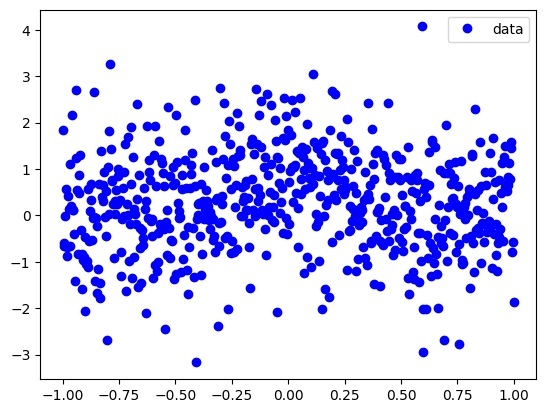

In [15]:
base  = B_Spline(
    knots=np.linspace(-1,1,10+1),
    order=3
)

hb = HB_Spline(base)

samples = np.shape(base.compute_base().get_collocation_matrix())[1]

def runge_function(x):
    return 1 / (1 + 25 * x**2)

x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
    
y = y_real + np.random.normal(0, 1, len(x))

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()


MSE:1.043227e+00
MSE:1.027666e+00
MSE:9.710130e-01


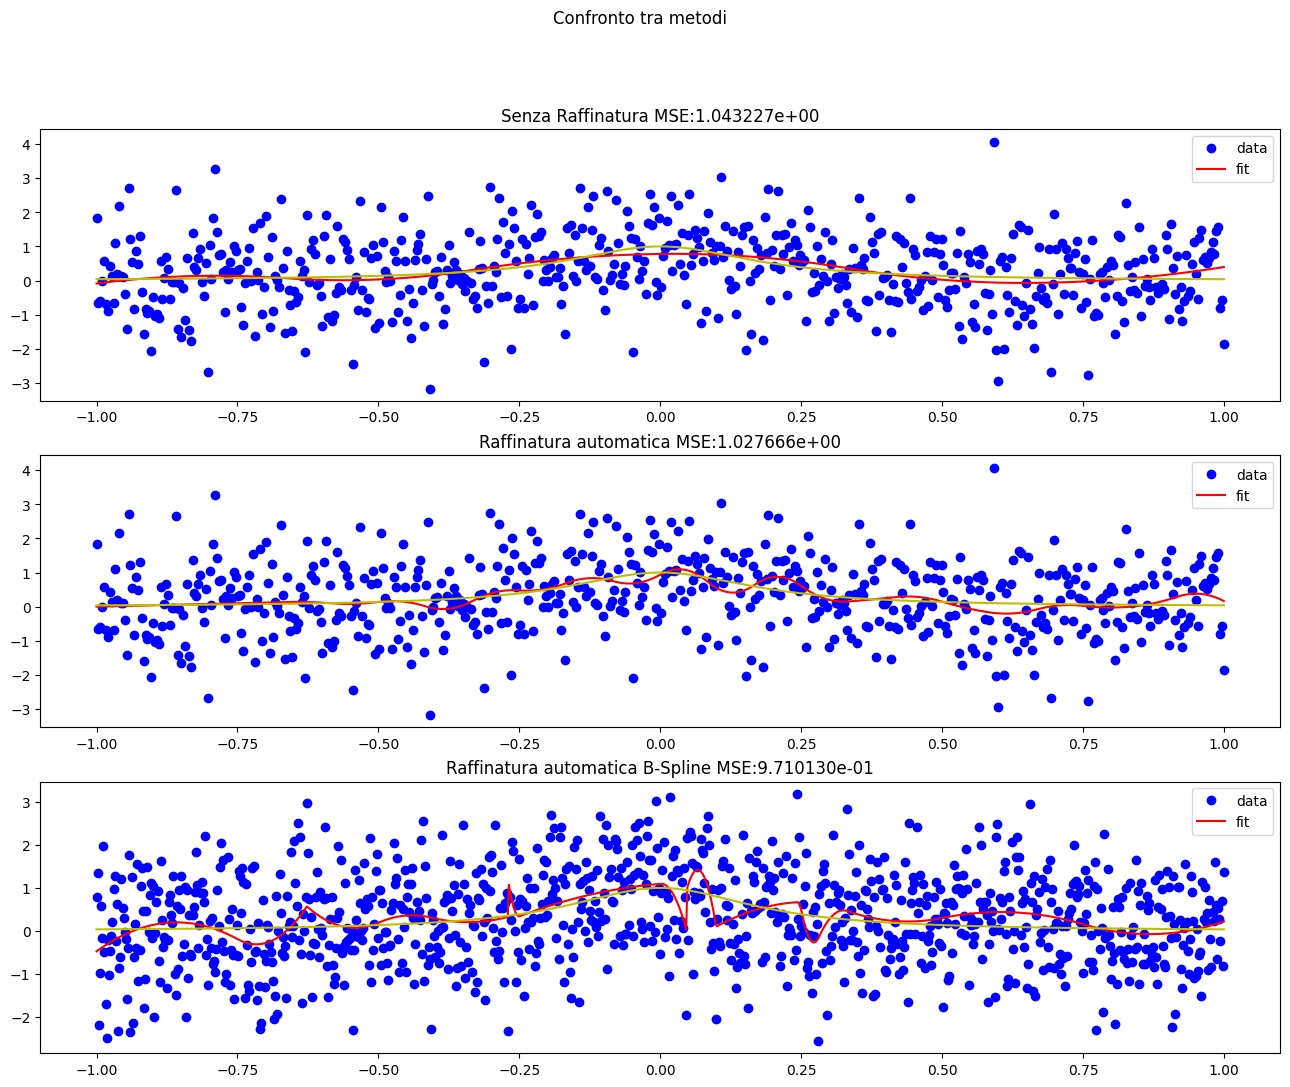

In [16]:
model = Model(
    base=hb,
    data=data
).fit()

fig, ax = plt.subplots(3, 1, figsize=(16,12))
model.plot(ax[0])
ax[0].plot(x, y_real, "y-", label="real")
ax[0].set_title("Senza Raffinatura"+" MSE:"+"{:e}".format(model.mse))

model.iterative_refine().plot(ax[1])
ax[1].plot(x, y_real, "y-", label="real")
ax[1].set_title("Raffinatura automatica"+" MSE:"+"{:e}".format(model.mse))

#Base B-Spline
base  = B_Spline(
    knots= [-1,-1,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1,1],
    order=3
)
samples = np.shape(base.compute_base().get_collocation_matrix())[1]
x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
y = y_real + np.random.normal(0, 1, len(x))
data = np.matrix([x, y]).T

c = Model(
    base=base,
    data=data
).fit().iterative_refine()

c.plot(ax[2])
ax[2].plot(x, y_real, "y-", label="real")
ax[2].set_title("Raffinatura automatica B-Spline"+" MSE:"+"{:e}".format(c.mse))

plt.suptitle("Confronto tra metodi")
plt.show()



# Conclusioni

Il criterio di scelta dell'intervallo di rifinitura viene effettuata scegliendo i dati che danno maggior contributo a MSE e si itera questo procedimento fino a che MSE dell'approssimazione risultante è migliore rispetto alla precedente. Per migliore si intende che si adatta meglio ai dati e che quindi ha MSE minore. Come possiamo vedere dagli esempio, questo può portare ad overfitting e ad allontanare l'approssimante dalla funzione generatrice.